In [1]:
import pickle as pkl
import interp_utils
import h5py
import glob
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import model_selection
model_list = ['CNN','gpn','NT']

## Plotting

In [2]:
def plot_collective_saliency(top_x,saliency_pattern,sal_index,model = model_list):
    collective_saliency = []
    for model in model_list:
        sal_f = './top_saliency/'+model+saliency_pattern
        saliency = np.load(sal_f)
        if model =='NT':
            collective_saliency.append(saliency['arr_0'][sal_index])
        else:
            collective_saliency.append(saliency['arr_1'][sal_index])
    for i in range(len(collective_saliency[0])):
        fig, axs = plt.subplots(3, 1, figsize=[20, 2*3],sharex = False, sharey= False)
        interp_utils.plot_value_per_loc(top_x[i:i+1],collective_saliency[0][i:i+1],ax = axs[0])
        interp_utils.plot_value_per_loc(top_x[i:i+1],collective_saliency[1][i:i+1],ax = axs[1])
        interp_utils.plot_value_per_loc(top_x[i:i+1],collective_saliency[2][i:i+1],ax = axs[2])
    plt.show()
    

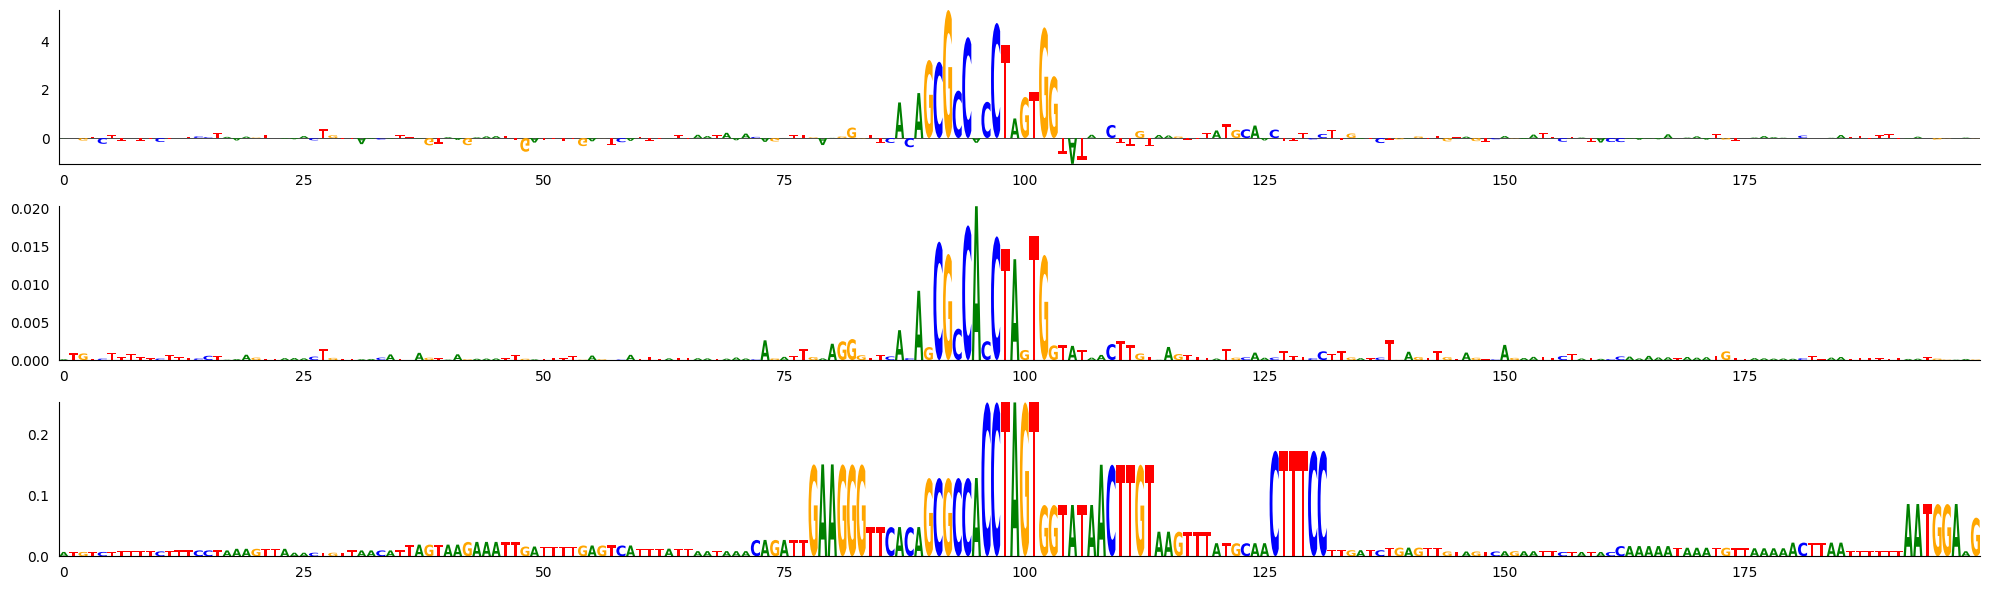

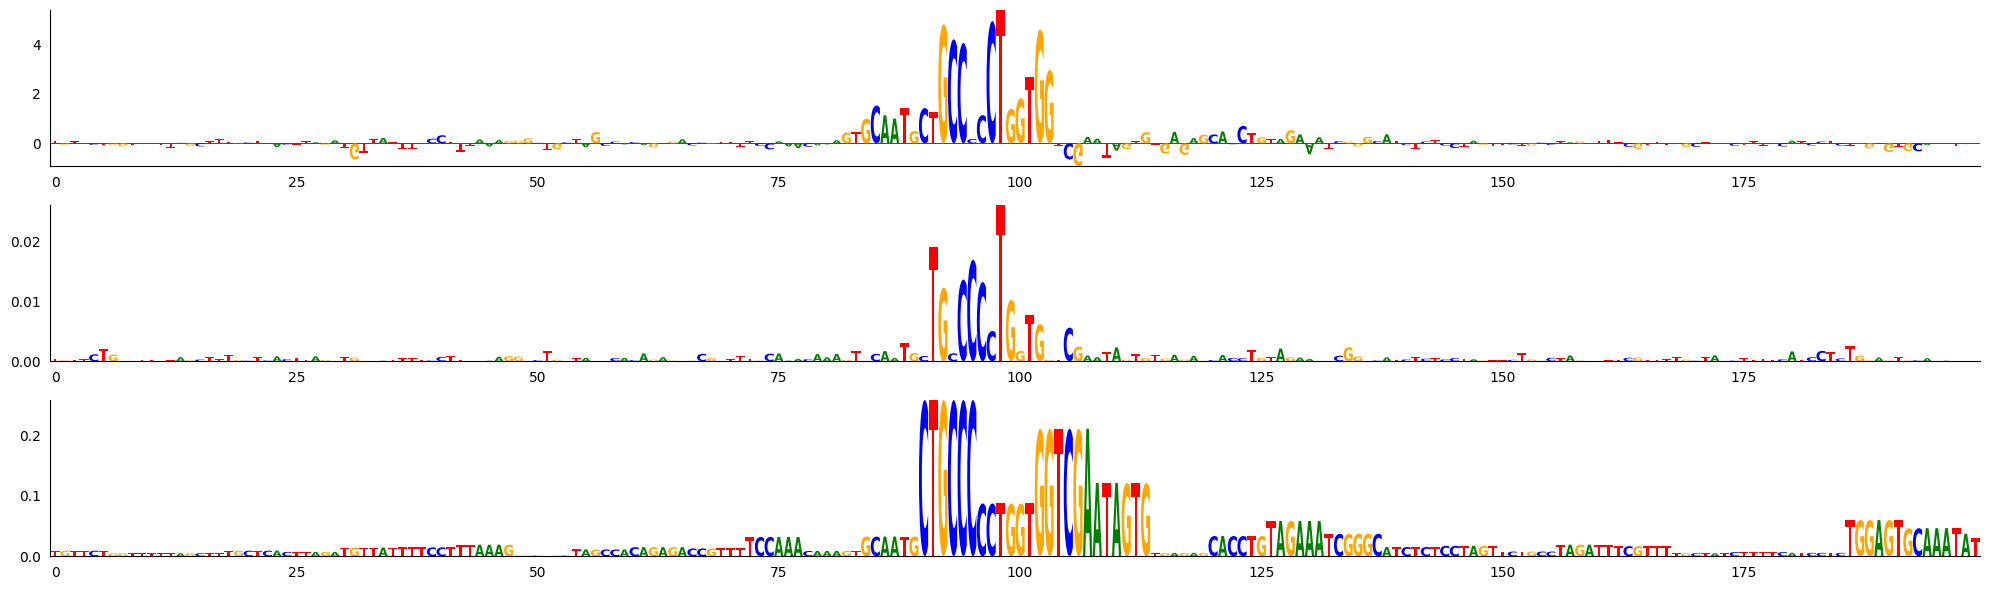

In [4]:
## Chip
count = 2
#sal_index = np.random.choice(500,count,replace=False)
sal_index = range(count)
exp = 'CTCF'
top_x = np.load('./top_seq/chip/'+exp+'.npz')['arr_0']
top_x = top_x[sal_index]
plot_collective_saliency(top_x,'_chip_'+exp+'.npz',sal_index)

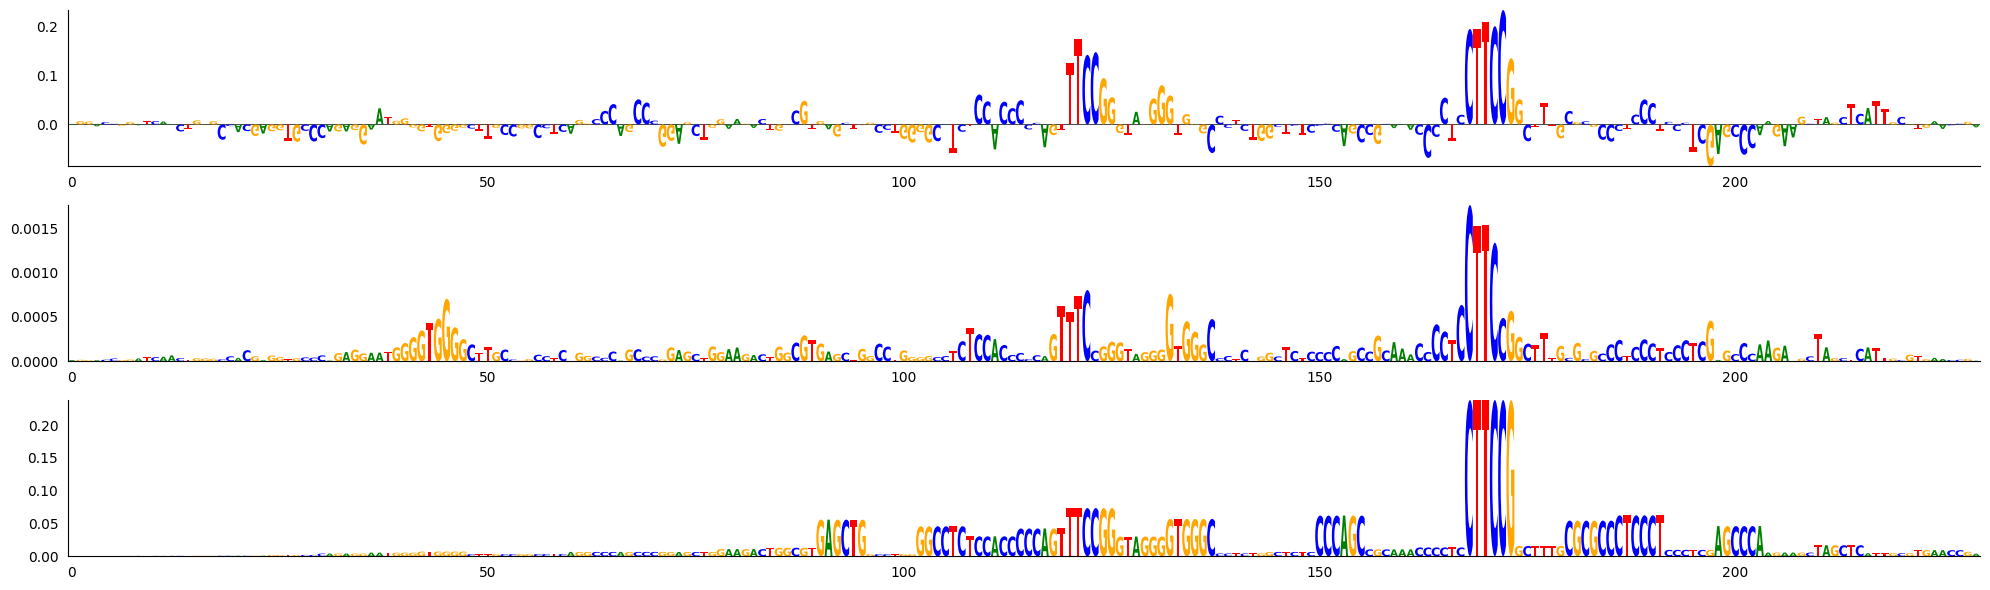

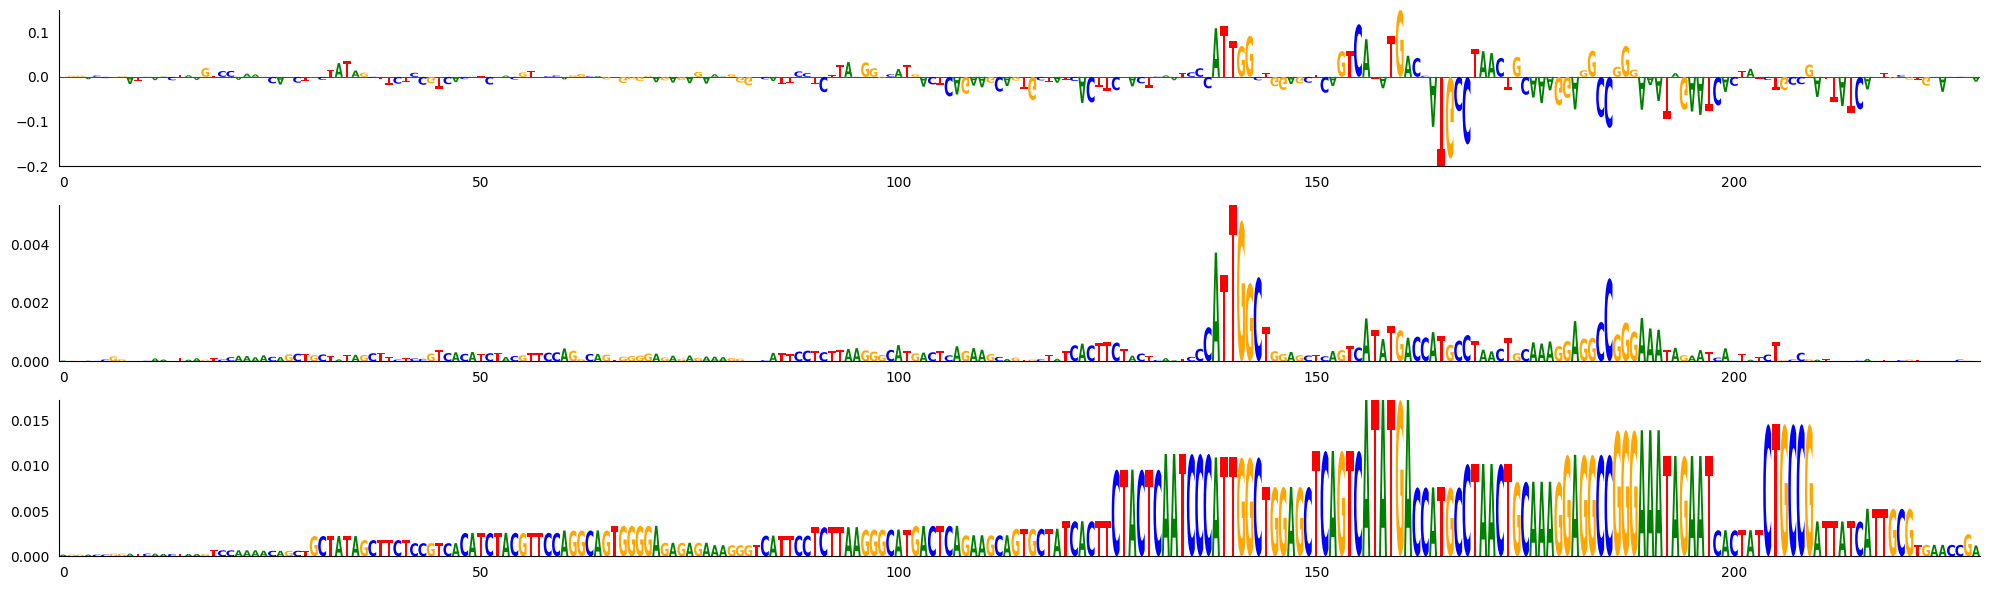

In [7]:
## Lenti
count = 2
sal_index = np.random.choice(500,count,replace=False)
#sal_index = range(count)
ct = 'K562'
top_x = np.load('./top_seq/lenti_'+ct+'.npz')['arr_0']
top_x = top_x[sal_index]

plot_collective_saliency(top_x,'_lenti_'+ct+'.npz',sal_index)

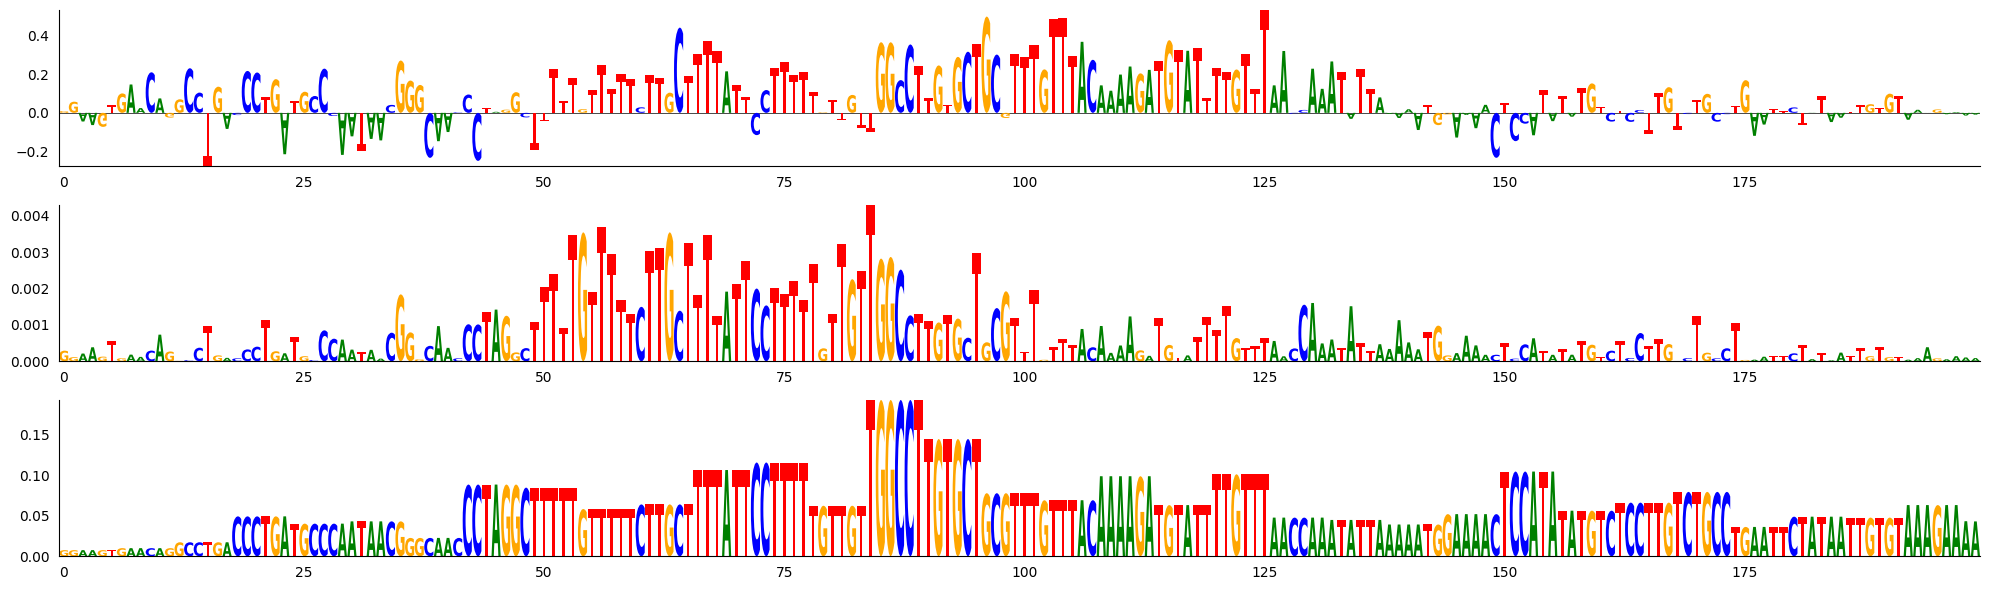

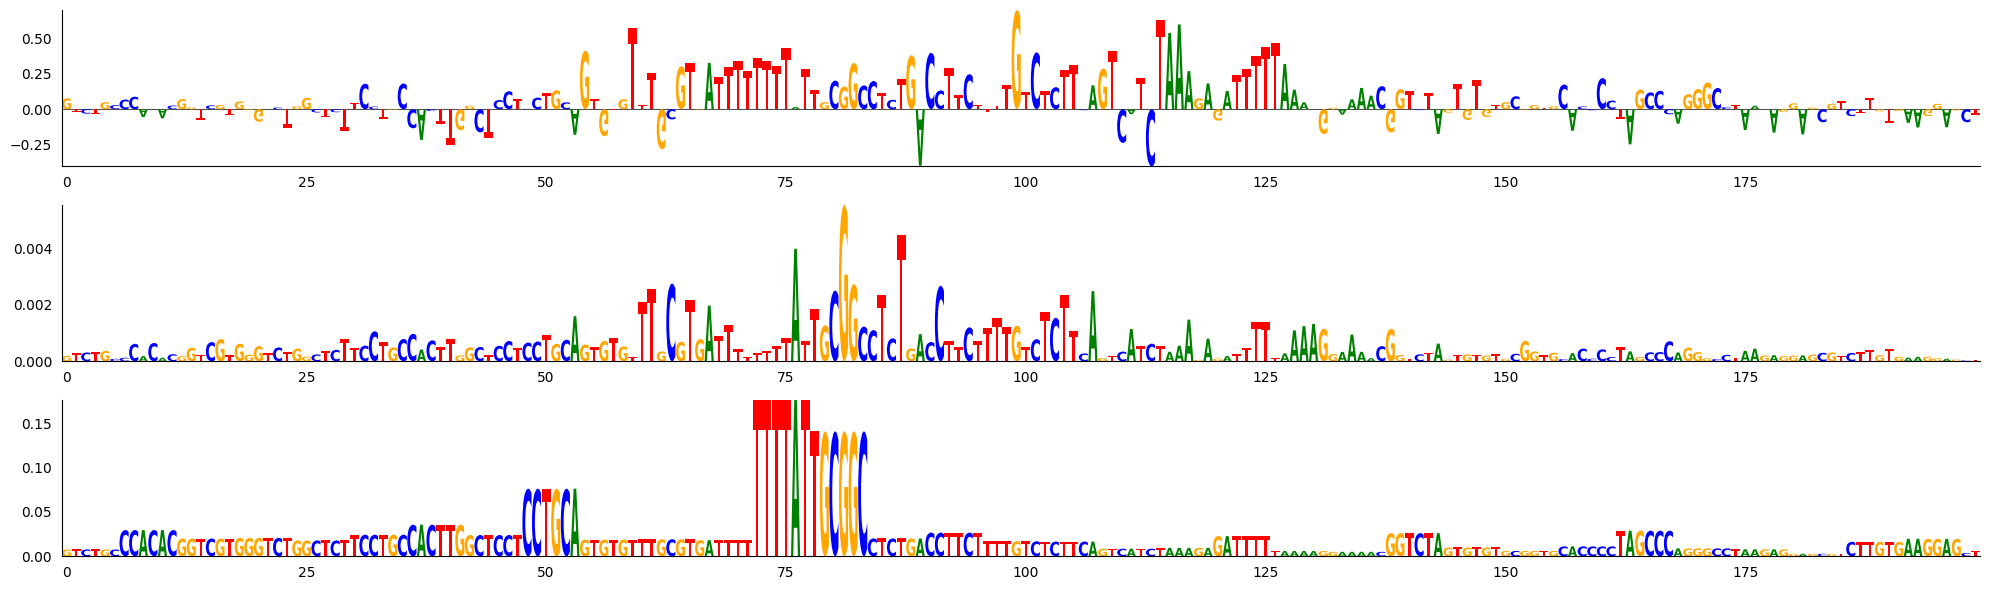

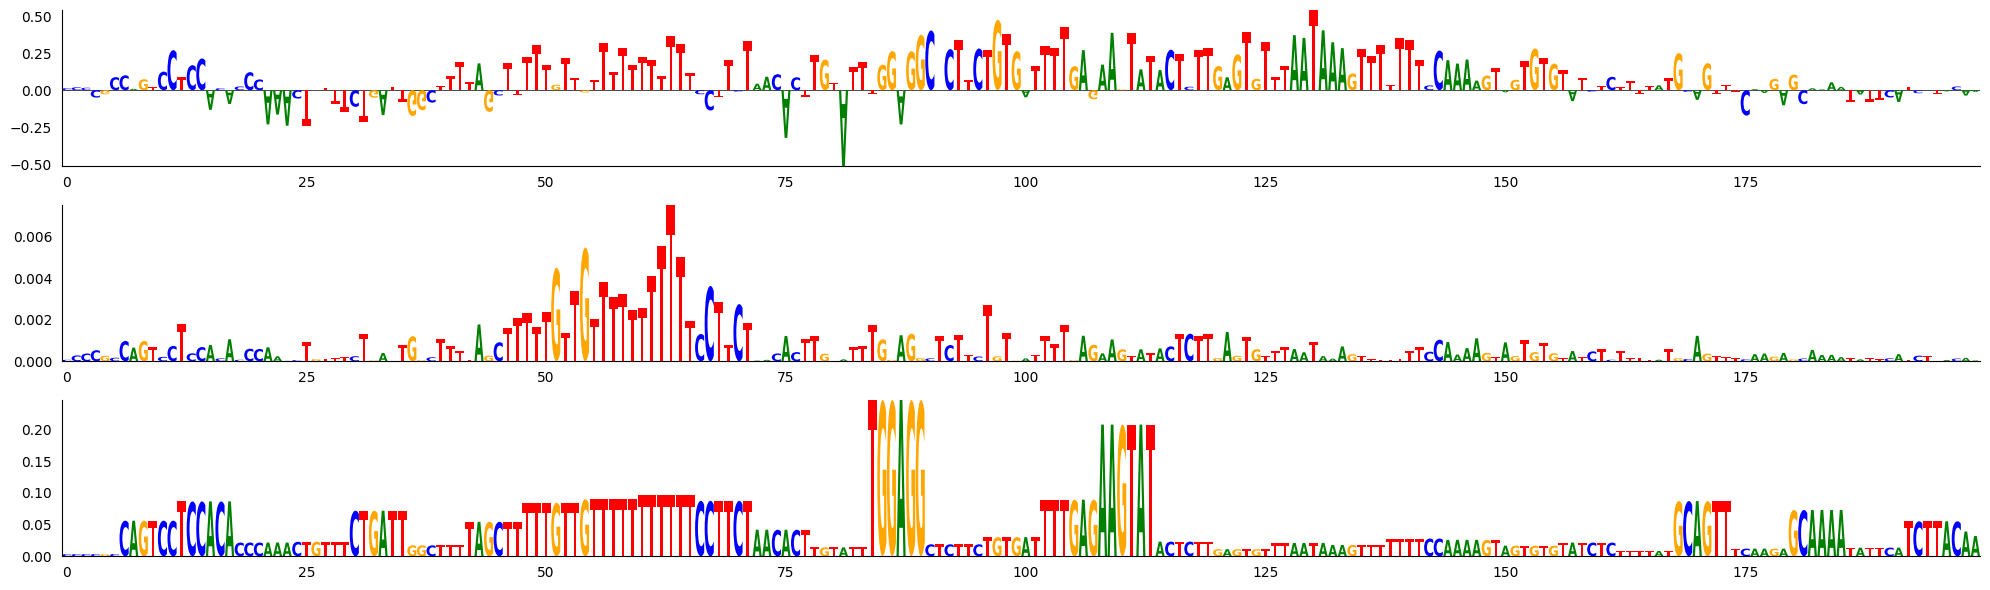

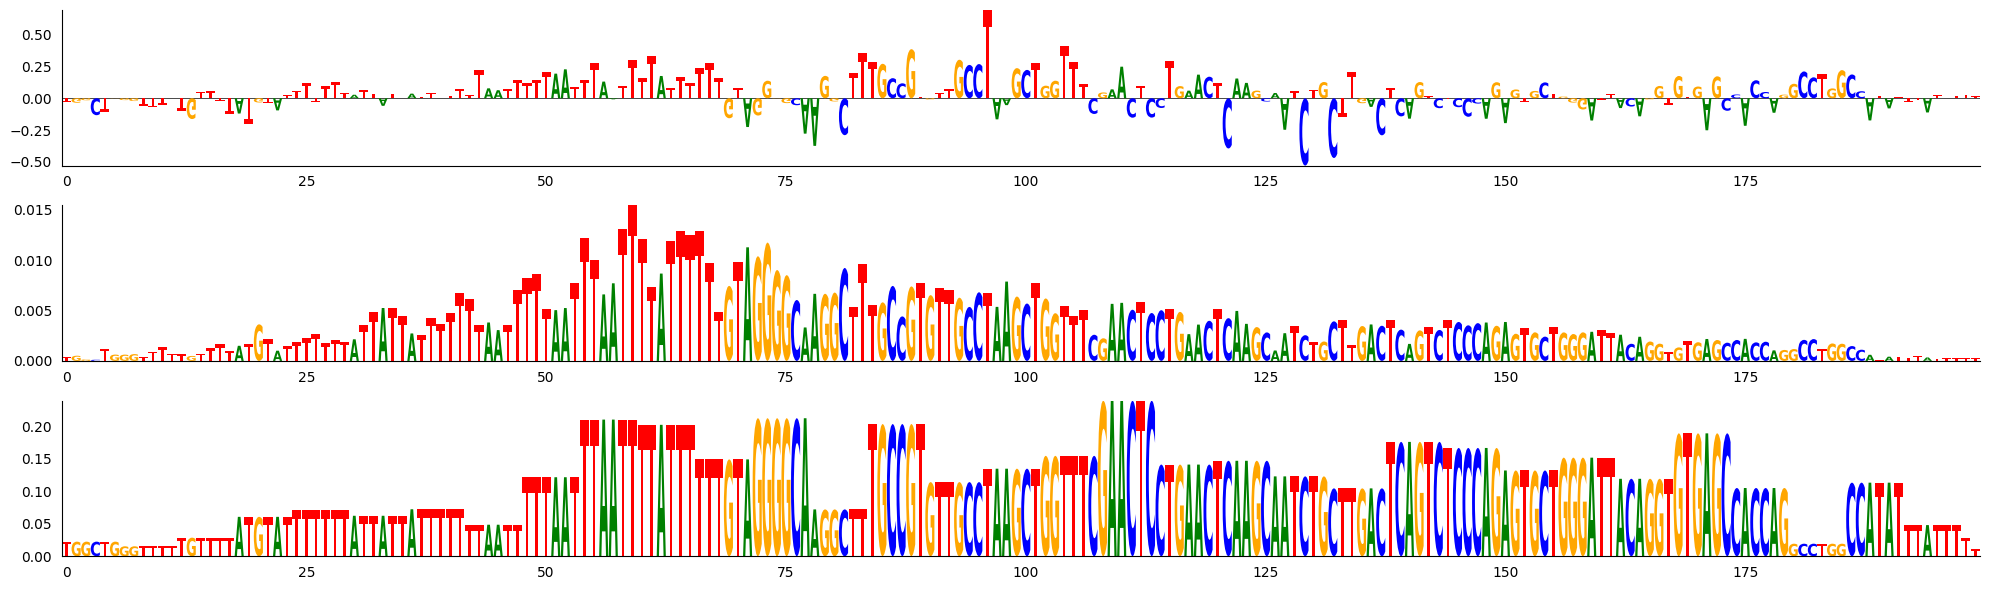

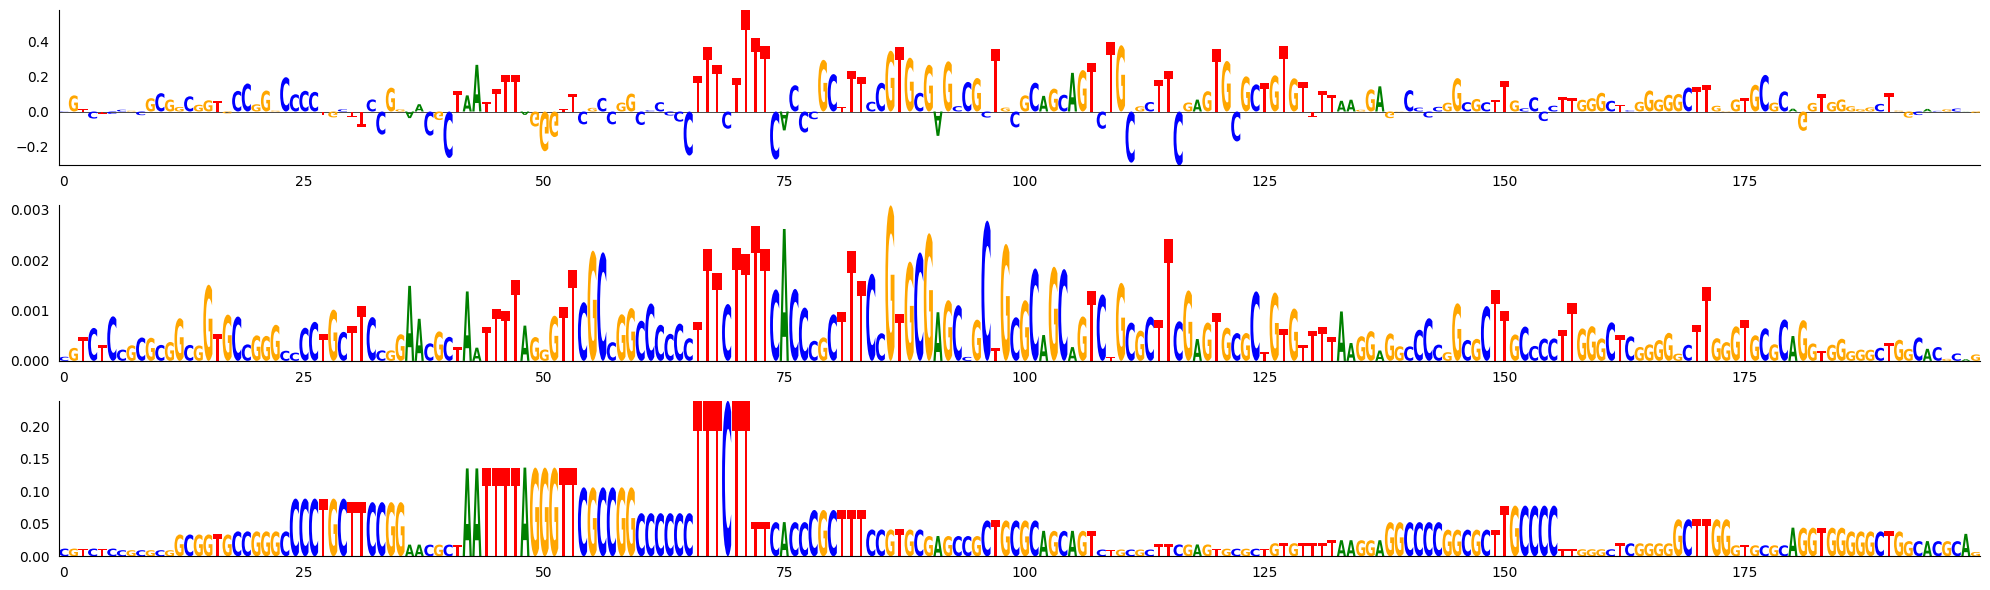

In [9]:
## Clip
count = 5
#sal_index = np.random.choice(500,count,replace=False)
sal_index = range(count)
exp = 'TIA1'
top_x = np.load('./top_seq/clip/'+exp+'.npz')['arr_0']
top_x = top_x[sal_index]
plot_collective_saliency(top_x,'_clip_'+exp+'.npz',sal_index)

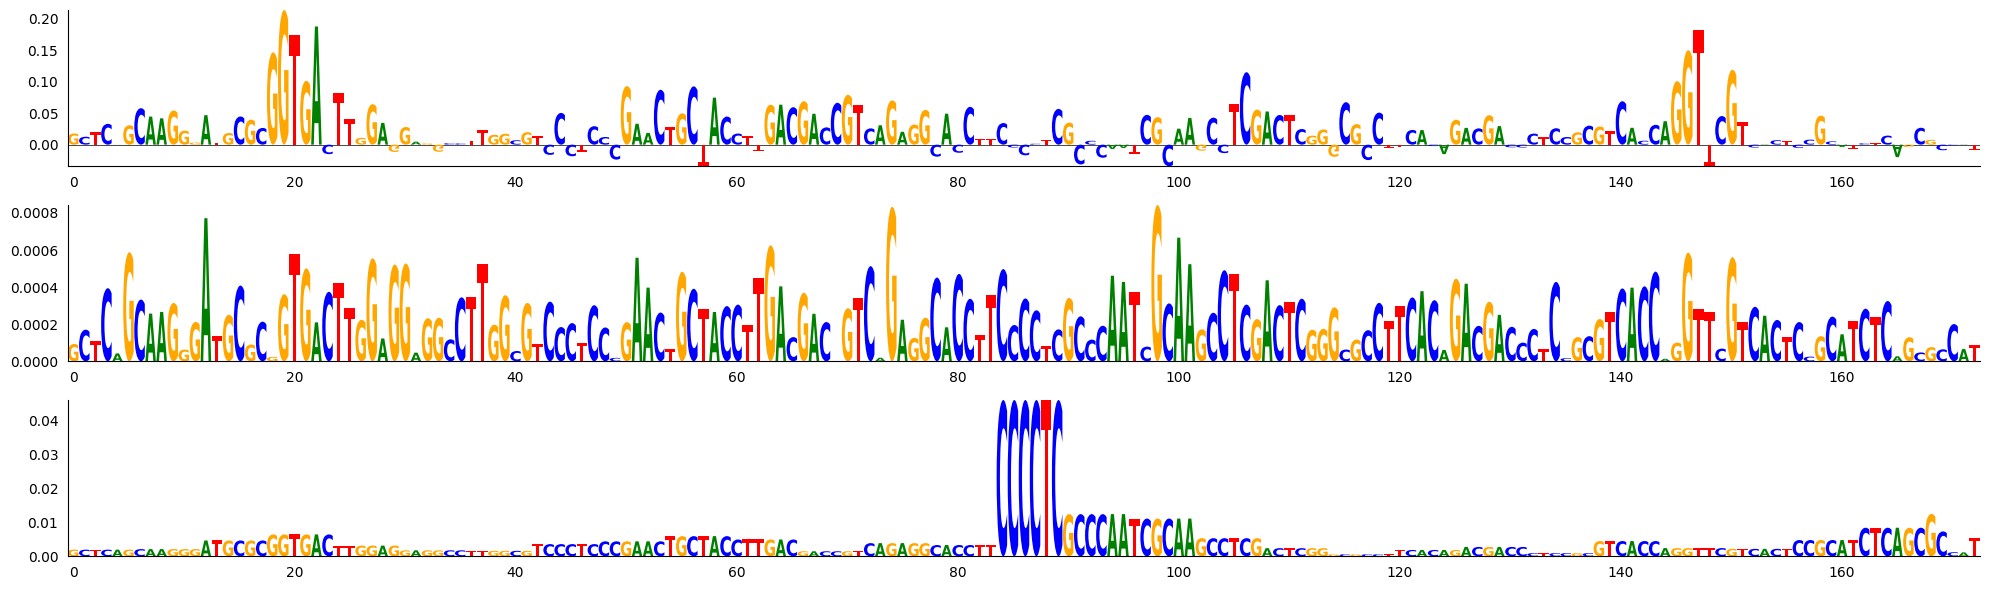

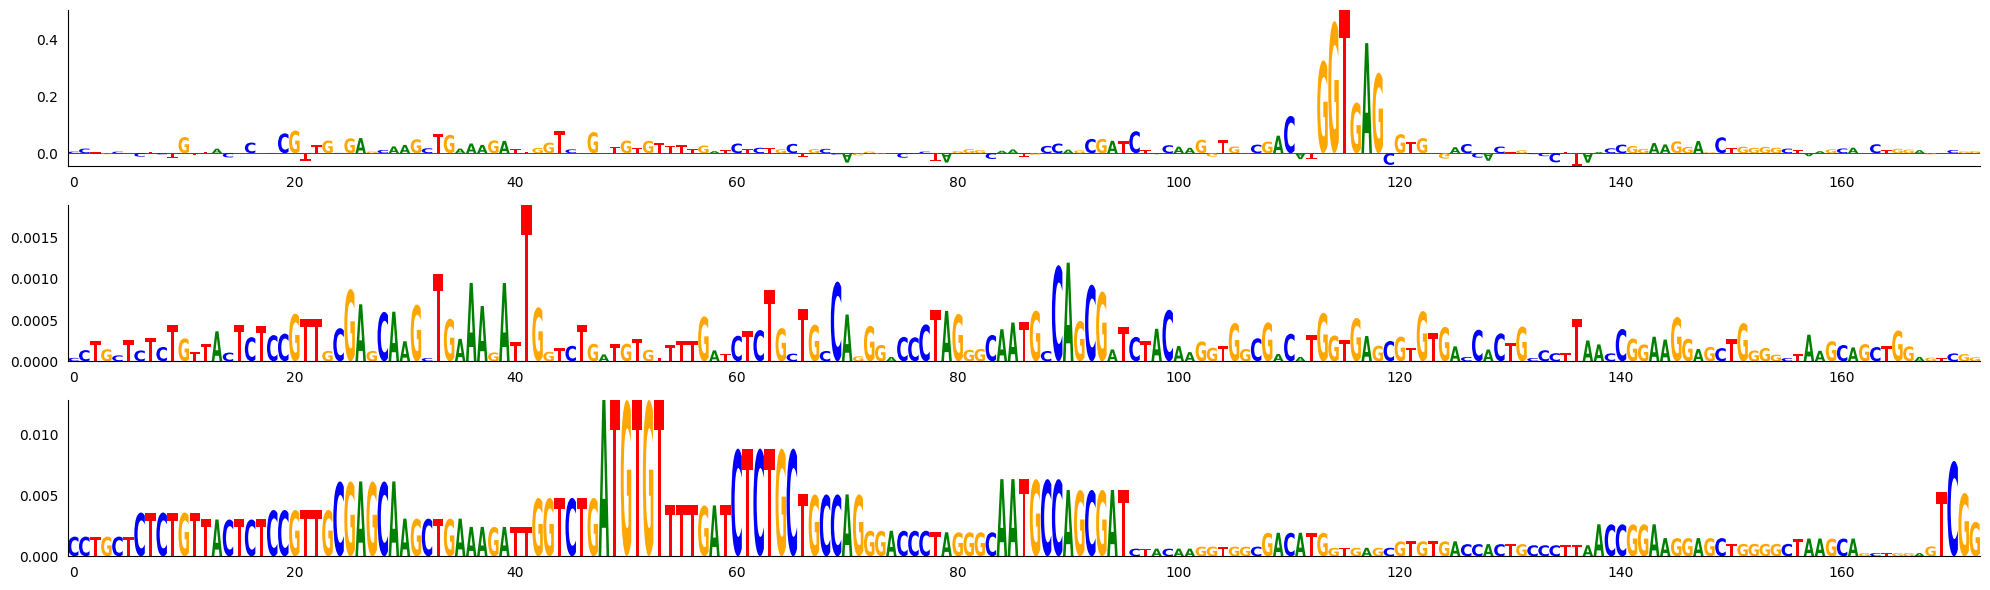

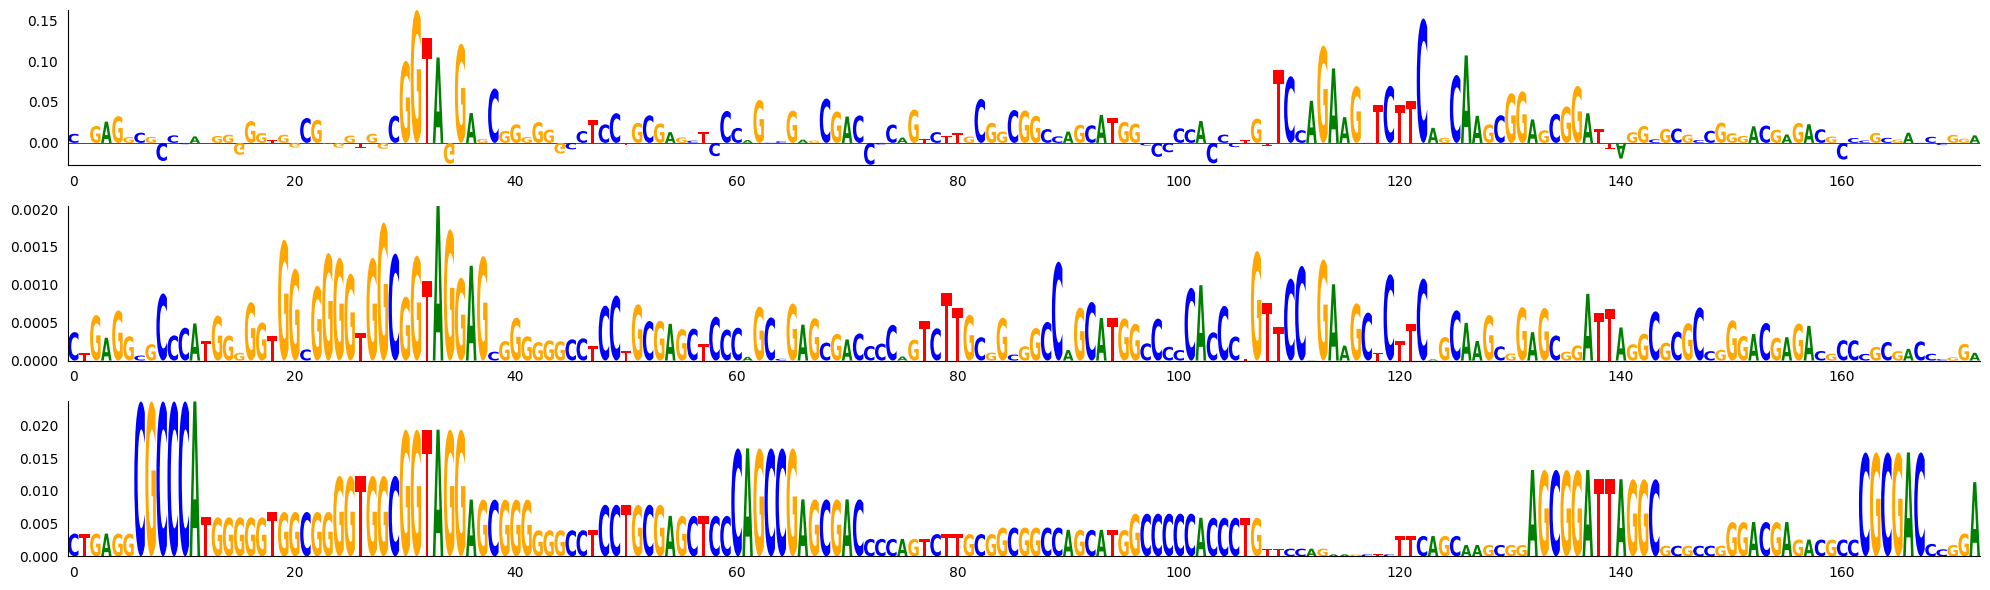

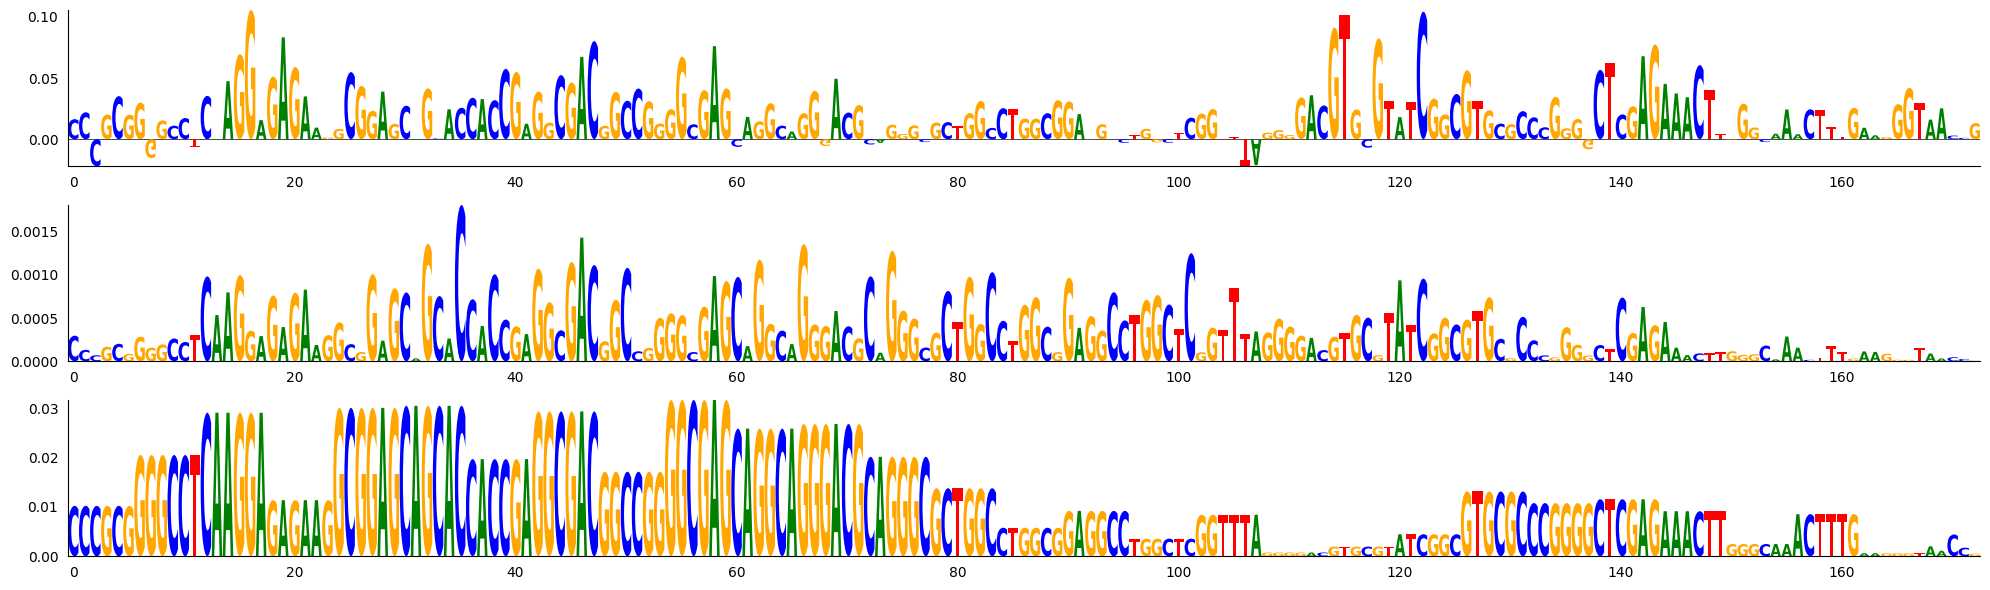

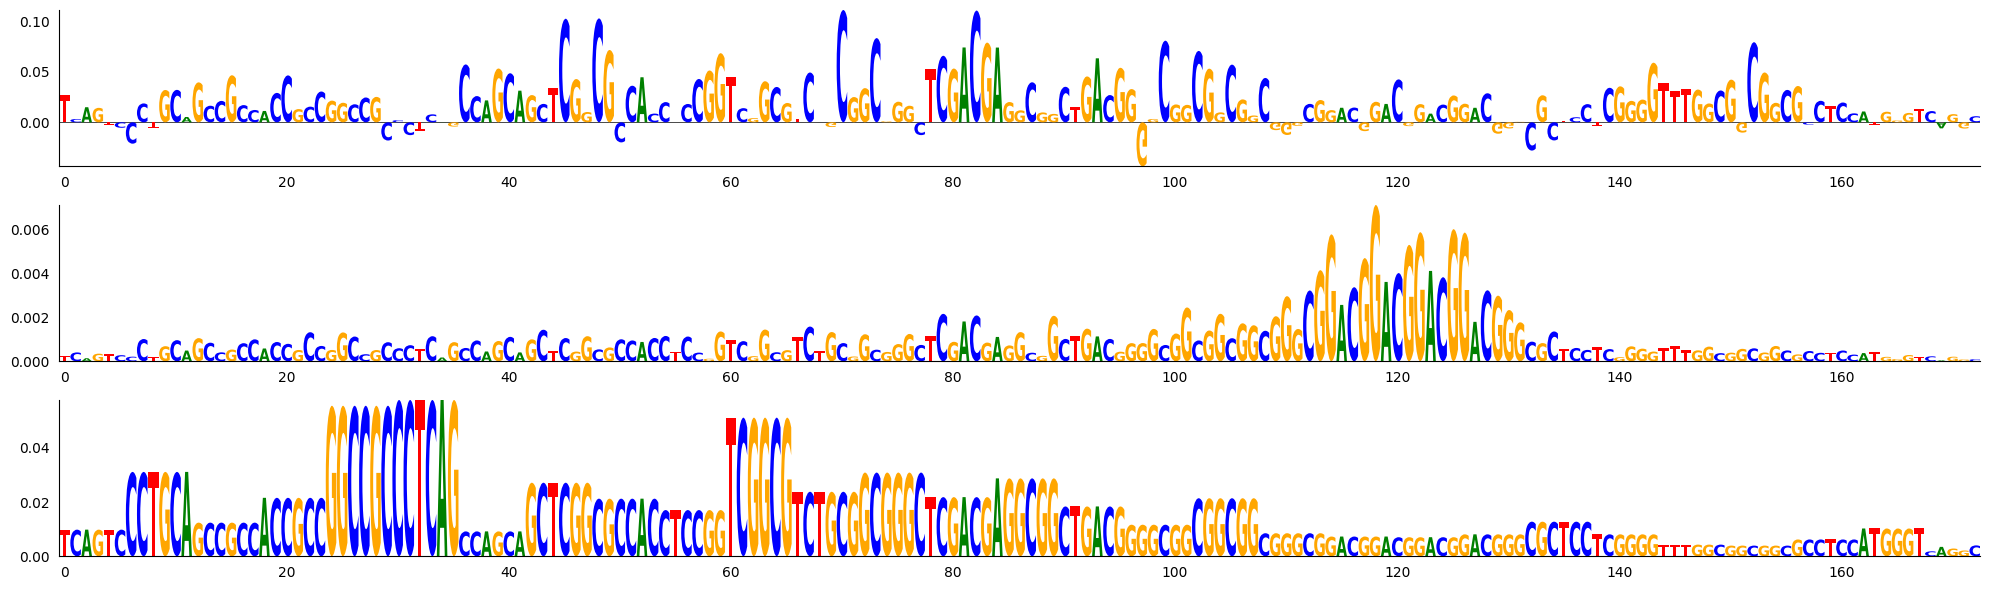

In [10]:
## Insert
count = 5
sal_index = np.random.choice(500,count,replace=False)
#sal_index = range(count)
top_x = np.load('./top_seq/insert.npz')['arr_0']
top_x = top_x[sal_index]
plot_collective_saliency(top_x,'_insert.npz',sal_index)

## Correlation Calculation

In [65]:
def correlation_cal(model_1,model_2,saliency_pattern):
    sal_f = './top_saliency/'+model_1+saliency_pattern
    sal_1 = np.load(sal_f)['arr_1']
    sal_f = './top_saliency/'+model_2+saliency_pattern
    sal_2 = np.load(sal_f)['arr_1']  

    pr = []
    sr = []
    for i in range(len(sal_1)): 
        pr.append(scipy.stats.pearsonr(sal_1[i],sal_2[i])[0])
        sr.append(scipy.stats.spearmanr(sal_1[i],sal_2[i])[0])

    return pr,sr

In [58]:
ct = 'K562'
pr_gpn,sr_gpn = correlation_cal('CNN','gpn','_lenti_'+ct+'.npz')
np.mean(pr_gpn)

0.24817014834938425

In [64]:
ct = 'K562'
pr_nt,sr_nt = correlation_cal('CNN','NT','_lenti_'+ct+'.npz')
np.mean(pr_nt)

0.09046072295162676

In [70]:
lims

[-0.5573272823023007, 0.8354764920529678]

Text(0, 0.5, 'GPN PR')

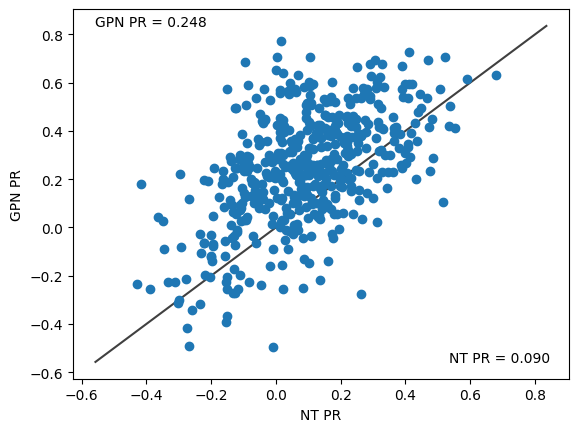

In [76]:
fig, ax = plt.subplots()
ax.scatter(x = pr_nt, y = pr_gpn)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.text(lims[0],lims[1],'GPN PR = 0.248')
ax.text(lims[1]-0.3,lims[0],'NT PR = 0.090' )
plt.xlabel('NT PR')
plt.ylabel('GPN PR')